In [1]:

import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import json 
from collections import Counter
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
with open("result/dataMultidisciplinaryCognitiveSkillsFrameworkRestrict.json", 'r') as openfile:
    #with open("result/dataCategory.json", 'r') as openfile:
    # Reading from json file
    dataCategory = json.load(openfile)
cognitive_skills_community = {
                    "cognitive_process_memory":[ 
                        "sustained_attention", "selective_attention", "divided_attention", "vigilance_attention","attention_shifting",
                        "processing_speed", "visual_processing_speed", "auditory_processing_speed",
                        "prospective_memory", "working_memory", "episodic_memory", "semantic_memory", "procedural_memory", "iconic_memory", "echoic_memory", "spatial_memory"],
                    "executive_function":[ 
                        "planning", "organization", "goal_setting","time_management", 
                        "problem_solving", "mental_flexibility", "strategic_thinking","adaptability",
                        "impulse_control", "decision_making","emotional_regulation","risk_assessment",
                        "abstract_thinking", "reasoning", "cognitive_flexibility", "creativity"], #concept_formation
                    "language_communication":[
                         "expressive_language", "receptive_language", "naming", "fluency", "comprehension", "repetition", "reading", "writing", 
                         "pragmatics", "discourse_ability", "linguistic_analysis", "narrative_skills"],
                    "social_cognition":
                        ["recognition_of_social_cues", "theory_of_mind", "empathy", "social_judgment","intercultural_competence","conflict_resolution","self_awareness","relationship_management"]
}

all_skill_label = []
for func, skill_list in cognitive_skills_community.items():
    all_skill_label += skill_list
def get_dataset_list(dataset_list):
    dataname = []
    for data in dataset_list:
        if "subset" not in dataset_list[data].keys():
            dataname.append(data)
        else:
            for subset in dataset_list[data]["subset"]:
                dataname.append(subset)
    return dataname
def returnCognitive(x):
    for function, skill_list in cognitive_skills_community.items():
        if x in skill_list:
            return function

## Analyze Frequency of Skills

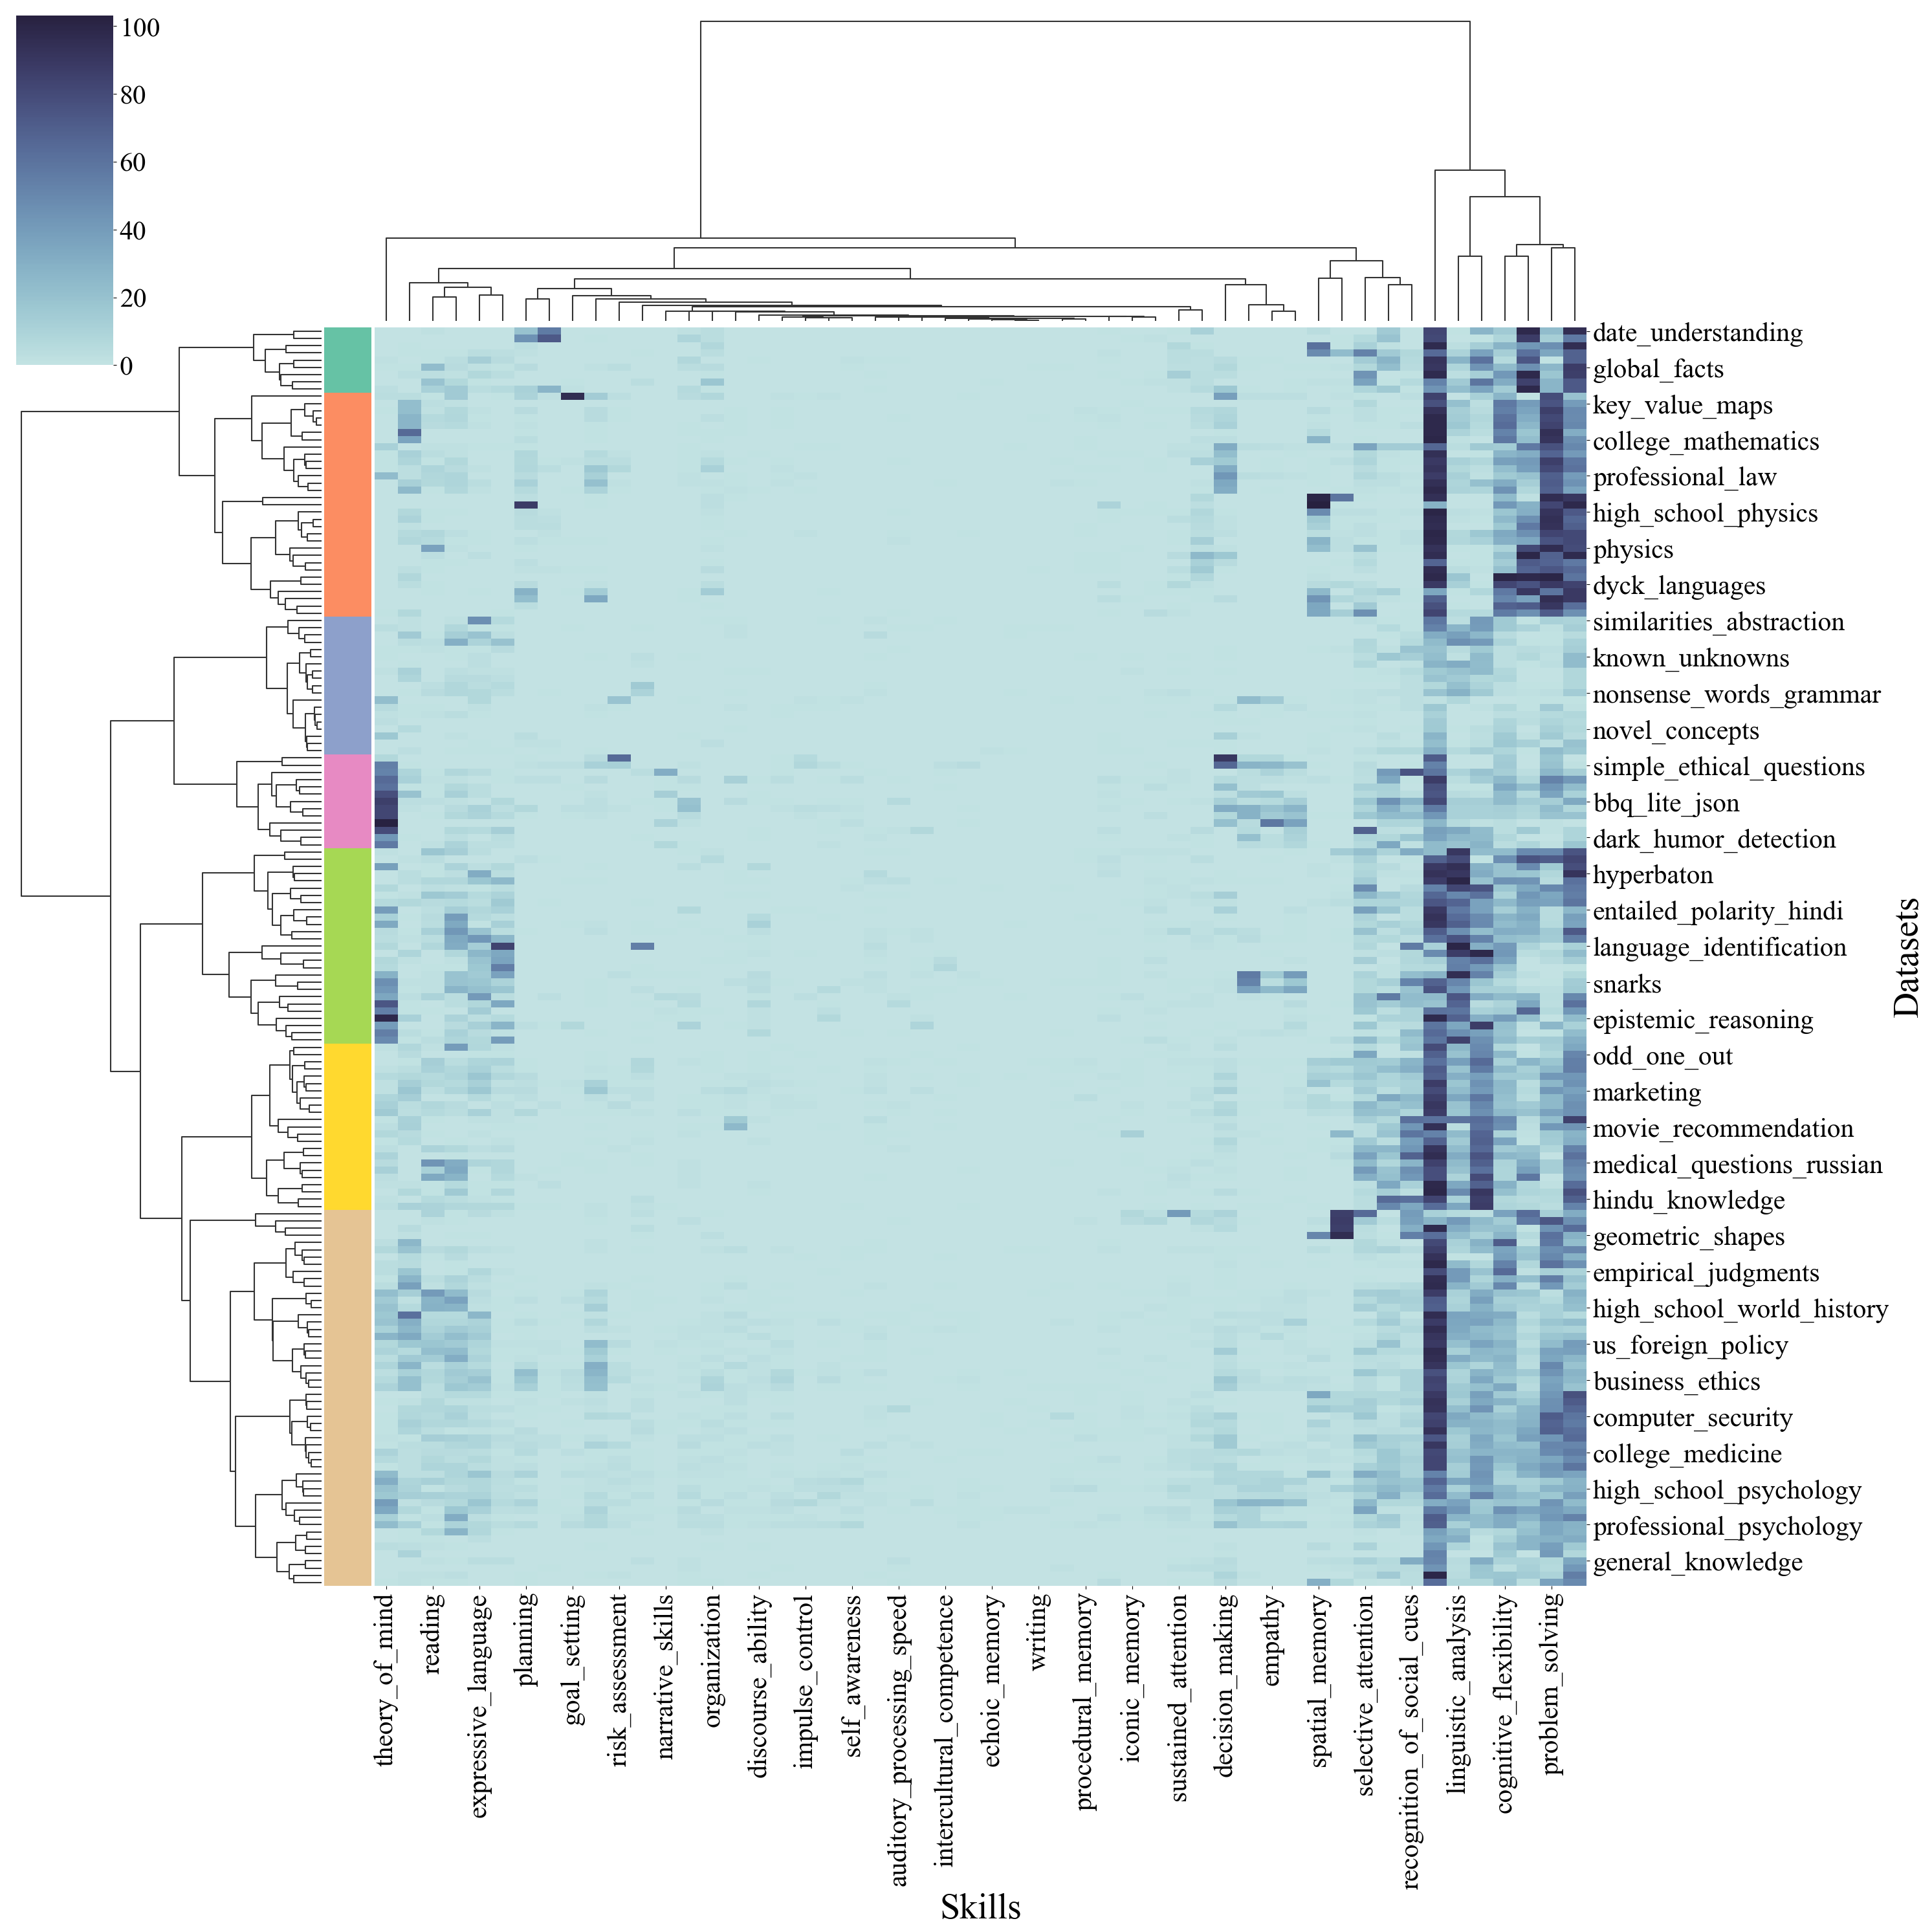

In [ ]:
from matplotlib import rc

# Set font to Times New Roman
rc('font', **{'family': 'serif', 'serif': ['Times New Roman'], 'size': 30})
rc('text', usetex=False)

# Step 1: Flatten the skills list and count frequency of each skill
all_skills = [skill for skills in dataCategory.values() for skill in skills]
skill_counts = Counter(all_skills)



# Step 1: Create a list of unique skills and datasets
unique_skills = list(set(skill for skills in dataCategory.values() for skill in skills))
unique_datasets = list(dataCategory.keys())
# Step 2: Create a dataset-skill matrix
matrix = pd.DataFrame(0, index=unique_datasets, columns=unique_skills)
# Step 3: Fill the matrix with counts of skills per dataset
for dataset, skills in dataCategory.items():
    for skill in skills:
        matrix.loc[dataset, skill] += 1
# Step 4: Create a clustered heatmap with dendrograms
# Step 4: Perform hierarchical clustering
linkage_matrix = linkage(matrix, method='ward')
# Step 5: Determine cluster assignments for rows (datasets)
num_clusters = 7  # Define the number of clusters you want
row_clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
# Step 6: Create a color palette to represent different clusters
palette = sns.color_palette("Set2", num_clusters)  # Use a color palette (e.g., "Set2")
row_colors = [palette[cluster - 1] for cluster in row_clusters]  # Map cluster numbers to colors
cognitive_category_mapping = {}
for category, skills in cognitive_skills_community.items():
    for skill in skills:
        cognitive_category_mapping[skill] = category
long_form_df = matrix.reset_index().melt(id_vars='index', var_name='Skill', value_name='Value')
long_form_df.rename(columns={'index': 'Dataset'}, inplace=True)
long_form_df['CognitiveCategory'] = long_form_df['Skill'].apply(returnCognitive)

# Save to CSV
darkcmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
long_form_df.to_csv('./result/lda_Iw/datasetskills_matrix.csv', index=False)
cluster_return = sns.clustermap(matrix, 
                            method='ward', 
                            cmap=darkcmap,#"Blues", 
                            cbar_kws={"shrink": 0.8},
                            figsize=(30,30), 
                            annot=False, 
                            #dendrogram_ratio=(.1, .2),
                            row_colors=row_colors,
                            tree_kws=dict(linewidths=1.5))
#plt.title("Clustered Heatmap of Dataset-Skill Mapping", fontsize=20)
ax = cluster_return.ax_heatmap
ax.set_xlabel('Skills',fontdict={"fontsize":40})
ax.set_ylabel('Datasets',fontdict={"fontsize":40})
plt.savefig("./result/lda_Iw/Skill Dataset Heatmap.pdf",dpi=100, bbox_inches='tight')
plt.show()
'''
sort_idx = cluster_return.dendrogram_col.reordered_ind
for idx in sort_idx:
    print(matrix.columns[idx])
print("++"*100)
sort_idx = cluster_return.dendrogram_row.reordered_ind
for idx in sort_idx:
    print(row_clusters[idx],matrix.index[idx])
'''

{'sustained_attention': 'skyblue', 'selective_attention': 'skyblue', 'divided_attention': 'skyblue', 'vigilance_attention': 'skyblue', 'attention_shifting': 'skyblue', 'processing_speed': 'skyblue', 'visual_processing_speed': 'skyblue', 'auditory_processing_speed': 'skyblue', 'prospective_memory': 'skyblue', 'working_memory': 'skyblue', 'episodic_memory': 'skyblue', 'semantic_memory': 'skyblue', 'procedural_memory': 'skyblue', 'iconic_memory': 'skyblue', 'echoic_memory': 'skyblue', 'spatial_memory': 'skyblue', 'planning': 'lightgreen', 'organization': 'lightgreen', 'goal_setting': 'lightgreen', 'time_management': 'lightgreen', 'problem_solving': 'lightgreen', 'mental_flexibility': 'lightgreen', 'strategic_thinking': 'lightgreen', 'adaptability': 'lightgreen', 'impulse_control': 'lightgreen', 'decision_making': 'lightgreen', 'emotional_regulation': 'lightgreen', 'risk_assessment': 'lightgreen', 'abstract_thinking': 'lightgreen', 'reasoning': 'lightgreen', 'cognitive_flexibility': 'light

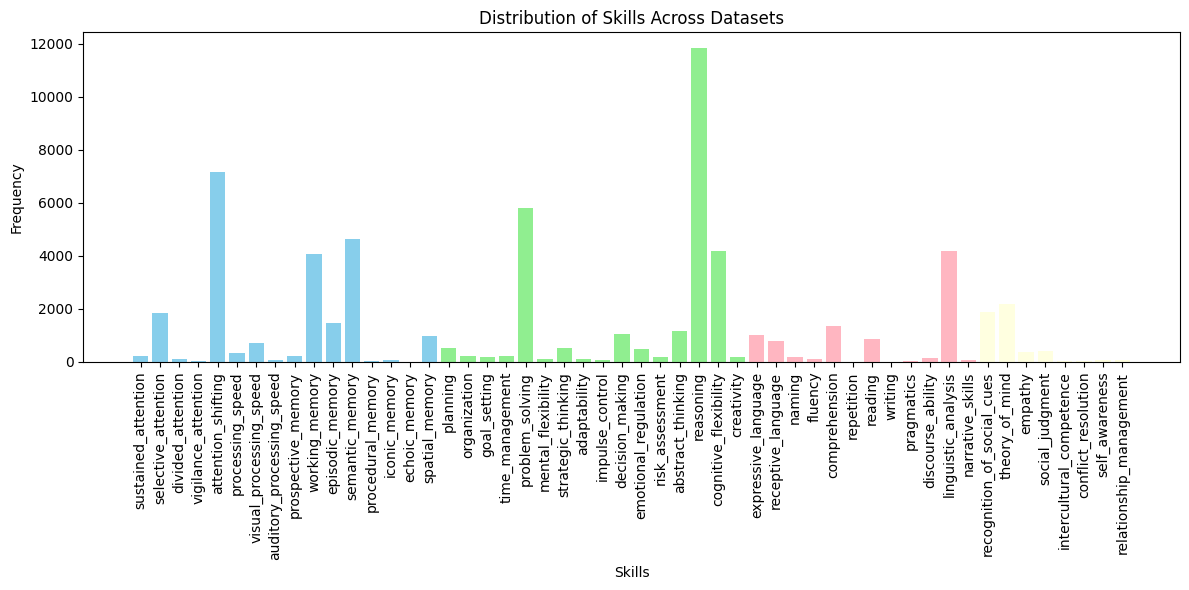

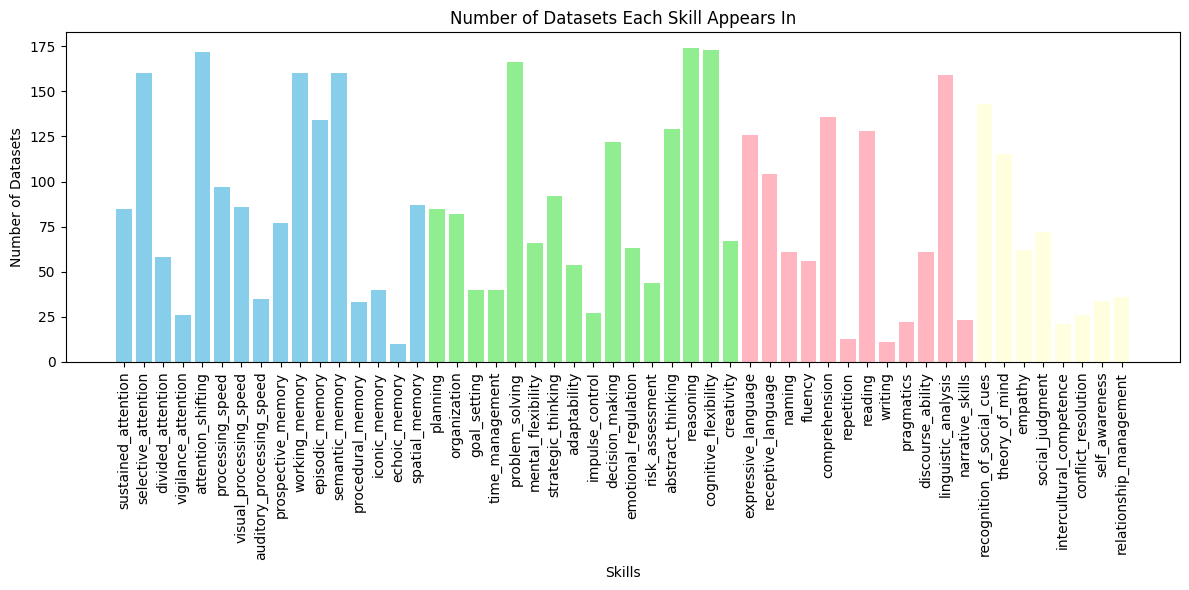

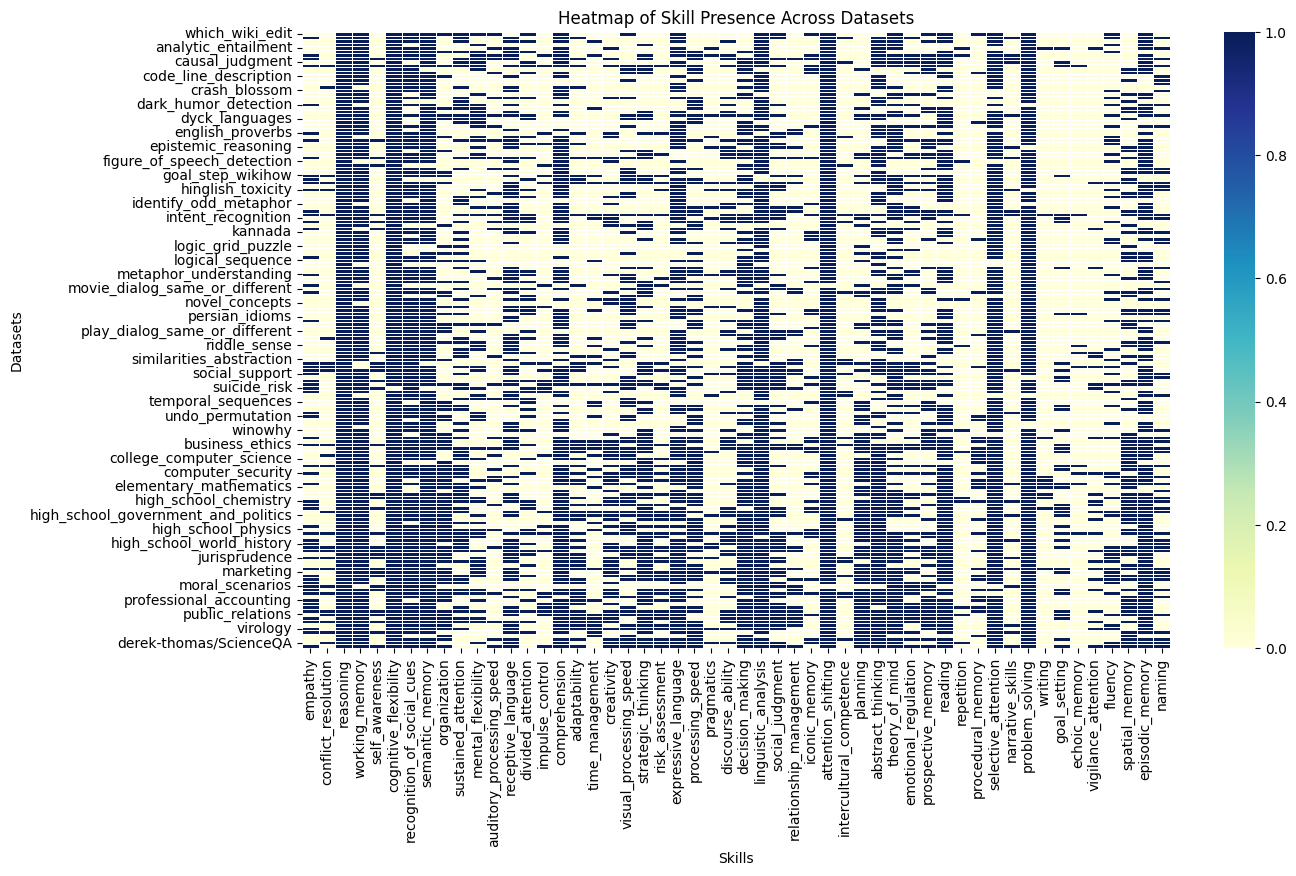

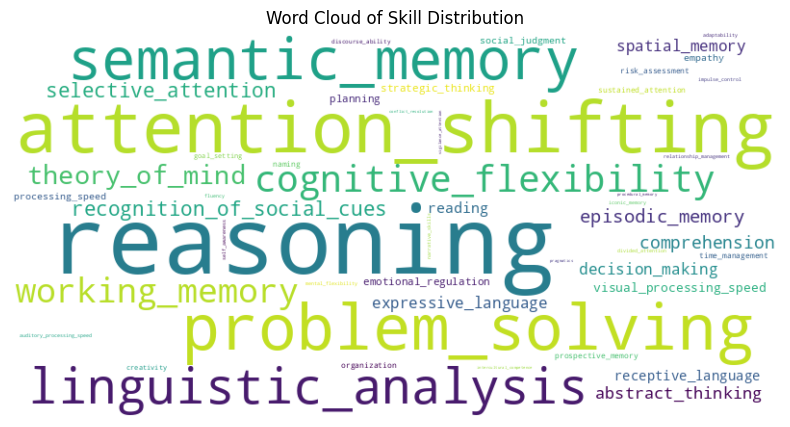

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

community_colors = {
    "cognitive_process_memory": "skyblue",
    "executive_function": "lightgreen",
    "language_communication": "lightpink",
    "social_cognition": "lightyellow"
}


# Flatten the skills into a single list and count frequencies
all_skills = [skill for skills in dataCategory.values() for skill in skills]
skill_counter = Counter(all_skills)

# Count how many datasets each skill appears in
skill_dataset_count = Counter(skill for dataset, skills in dataCategory.items() for skill in set(skills))

# Convert data to DataFrame for analysis
datasets = list(dataCategory.keys())
skills = list(set(all_skills))

data = []
for dataset in datasets:
    row = [1 if skill in dataCategory[dataset] else 0 for skill in skills]
    data.append(row)

df = pd.DataFrame(data, index=datasets, columns=skills)

skill_freq_dataset_cognitive = {"skills":[],"cognitive_function":[],"frequency":[], "dataset_freq":[]}
for category, skills in cognitive_skills_community.items():
    for skill in skills:
        skill_freq_dataset_cognitive["skills"].append(skill)
        skill_freq_dataset_cognitive["cognitive_function"].append(category)
        skill_freq_dataset_cognitive["frequency"].append(skill_counter[skill])
        skill_freq_dataset_cognitive["dataset_freq"].append(skill_dataset_count[skill])

skill_freq_dataset_cognitive_df = pd.DataFrame.from_dict(skill_freq_dataset_cognitive)
skill_freq_dataset_cognitive_df.to_csv('./result/lda_Iw/skills_frequency.csv', index=False)
# Plotting a bar chart of skill frequencies across all datasets
plt.figure(figsize=(12, 6))
print({skill: community_colors[skills] for skills in cognitive_skills_community for skill in cognitive_skills_community[skills]})
plt.bar([skill for skills in cognitive_skills_community.values() for skill in skills], [skill_counter[skill] for skills in cognitive_skills_community.values() for skill in skills], color=[community_colors[skills] for skills in cognitive_skills_community for _ in cognitive_skills_community[skills]])
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.title('Distribution of Skills Across Datasets')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting a bar chart of how many datasets each skill appears in
plt.figure(figsize=(12, 6))
plt.bar([skill for skills in cognitive_skills_community.values() for skill in skills], [skill_dataset_count[skill] for skills in cognitive_skills_community.values() for skill in skills], color=[community_colors[skills] for skills in cognitive_skills_community for _ in cognitive_skills_community[skills]])
plt.xlabel('Skills')
plt.ylabel('Number of Datasets')
plt.title('Number of Datasets Each Skill Appears In')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Heatmap to show the presence of skills in datasets
plt.figure(figsize=(14, 8))
sns.heatmap(df, annot=False, cmap="YlGnBu", cbar=True, linewidths=.5)
plt.xlabel('Skills')
plt.ylabel('Datasets')
plt.title('Heatmap of Skill Presence Across Datasets')
plt.show()

# Optional: Word Cloud for skill distribution
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skill_counter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Skill Distribution')
plt.show()


## Case Study certain dataset


In [16]:
dataset_skills = df.to_dict()
print(dataset_skills)

{'empathy': {'which_wiki_edit': 0, 'abstract_narrative_understanding': 1, 'anachronisms': 0, 'analogical_similarity': 0, 'analytic_entailment': 0, 'arithmetic': 0, 'authorship_verification': 1, 'bbq_lite_json': 1, 'causal_judgment': 0, 'cause_and_effect': 1, 'checkmate_in_one': 0, 'cifar10_classification': 0, 'code_line_description': 0, 'color': 0, 'common_morpheme': 0, 'conceptual_combinations': 0, 'crash_blossom': 0, 'crass_ai': 0, 'cryobiology_spanish': 0, 'cs_algorithms': 0, 'dark_humor_detection': 1, 'date_understanding': 0, 'disambiguation_qa': 0, 'discourse_marker_prediction': 0, 'dyck_languages': 0, 'elementary_math_qa': 0, 'emoji_movie': 0, 'empirical_judgments': 0, 'english_proverbs': 1, 'english_russian_proverbs': 0, 'entailed_polarity': 1, 'entailed_polarity_hindi': 0, 'epistemic_reasoning': 0, 'evaluating_information_essentiality': 0, 'fact_checker': 0, 'fantasy_reasoning': 1, 'figure_of_speech_detection': 0, 'formal_fallacies_syllogisms_negation': 0, 'general_knowledge': 

# Importance of Modules Analysis

## Analyze I_w with acc and pruning ratio

In [ ]:
def take_average(dict):
    data = dict["0"]
    iterations_block = list(["0","1","2","3","4"])
    iterations_channel = list(["0","1","2","3","4"])
    #for style , iterations in zip (["block","channel","block_random","channel_random"],[iterations_block,iterations_channel,iterations_block,iterations_channel]):
    for style , iterations in zip (["block","channel"],[iterations_block,iterations_channel,iterations_block,iterations_channel]):
        for iter in iterations:
            if iter == "0":
                continue
            for ratio in dict[iter][style]:
                for dataset in dict[iter][style][ratio]:
                    for norm in dict[iter][style][ratio][dataset]:
                        value = np.array(dict[iter][style][ratio][dataset][norm])
                        if len( value.shape) != 1:
                            shape_model = value.shape
                        data[style][ratio][dataset][norm]= (np.array(data[style][ratio][dataset][norm])+value)
                        if iter == iterations[-1]:
                            data[style][ratio][dataset][norm] = data[style][ratio][dataset][norm]/len(iterations)
    return data

def get_model():
    with open("/home/bhandk/MLNeuron/dataset_info.json", 'r') as openfile:
            # Reading from json file
            dataset_list = json.load(openfile)
    #Original Distribution
    with open("result/original_distribution_vicuna_7b.json", 'r') as openfile:
        vicuna_original = json.load(openfile)
    with open("result/original_distribution_llama_7b.json", 'r') as openfile:
        # Reading from json file
        llama_original = json.load(openfile)
    with open("result/original_distribution_llama_7b-chat.json", 'r') as openfile:
        # Reading from json file
        llama_chat_original = json.load(openfile)
    #Pruned Distribution
    with open("result/distribution_llama_7b.json", 'r') as openfile:
        # Reading from json file
        llama_distribution = json.load(openfile)
    with open("result/distribution_vicuna_7b.json", 'r') as openfile:
        # Reading from json file
        vicuna_distribution = json.load(openfile)
    with open("result/distribution_llama_7b-chat.json", 'r') as openfile:
        # Reading from json file
        llama_chat_distribution= json.load(openfile)
    with open("result/dataNeuropsychologicalDomainsCluster.json", 'r') as openfile:
        # Reading from json file
        dataset_community= json.load(openfile)
    return get_dataset_list(dataset_list), (llama_original,take_average(llama_distribution)), (llama_chat_original,take_average(llama_chat_distribution)), (vicuna_original,take_average(vicuna_distribution))
def create_plot_bog_modules(distribution, original_distribution, dataset_list,norm="|W|_0"):
    modules=["attn.q", "attn.k", "attn.v", "attn.o","gate","mlp.up", "mlp.down"]
    layer_modules_label=[ str(i)+"_"+m  for i in range(3,31) for m in modules]
    result_sparsity = {"pruning_ratio":[],"pruning_strategy":[],"dataset_name":[],"sparsity_ratio":[],"Iw":[]}
    result_delta = {"pruning_ratio":[],"pruning_strategy":[],"dataset_name":[],"delta_acc":[],"Iw":[]} 
    for pruner_style in ["block","channel"]:
        for pruner_ratio in ["3","15","20","25","30","35","40"]:
            for dataset_name in dataset_list:
                dataset_name = dataset_name.split('/')[-1]
                #get distribution of both
                pruned_data = distribution[pruner_style][pruner_ratio][dataset_name][norm][3:31,:].flatten()
                original_data = np.array(original_distribution["distribution"][norm])[3:31,:].flatten()

                #take the difference and normalize
                pruned_acc = distribution[pruner_style][pruner_ratio][dataset_name]["Accuracy"][2]
                original_acc = original_distribution[dataset_name][-1]

                sparsity_ratio = [w_pruned/w_org for w_org, w_pruned  in zip(original_data,pruned_data) ]
                min_weight_reduction = min(sparsity_ratio)
                range_weight_reduction = max(sparsity_ratio) - min_weight_reduction
                data = [(1-abs(original_acc-pruned_acc))*(((weight - min_weight_reduction) / range_weight_reduction)) for weight in sparsity_ratio ]
                for sp_ratio,iw in zip(sparsity_ratio,data):
                    result_sparsity["pruning_ratio"].append(pruner_ratio)
                    result_sparsity["pruning_strategy"].append(pruner_style)
                    result_sparsity["Iw"].append(iw)
                    result_sparsity["sparsity_ratio"].append(sp_ratio)
                    result_sparsity["dataset_name"].append(dataset_name)
                result_delta["pruning_ratio"].append(pruner_ratio)
                result_delta["pruning_strategy"].append(pruner_style)
                result_delta["Iw"].append(np.mean(data))
                result_delta["delta_acc"].append(abs(original_acc-pruned_acc))
                result_delta["dataset_name"].append(dataset_name) 
    return pd.DataFrame.from_dict(result_sparsity), pd.DataFrame.from_dict(result_delta)


In [ ]:
dataset_list, llama, llama_chat, vicuna  = get_model()
data_llama = create_plot_bog_modules(llama[1], llama[0], dataset_list,norm="|W|_0")
data_llama_chat = create_plot_bog_modules(llama_chat[1], llama_chat[0], dataset_list,norm="|W|_0")
data_vicuna = create_plot_bog_modules(vicuna[1], vicuna[0], dataset_list,norm="|W|_0") 
def concatenate(data_llama,data_llama_chat,data_vicuna):
    data_llama["model"],data_llama_chat["model"],data_vicuna["model"] = data_llama.shape[0]*["llama"],data_llama_chat.shape[0]*["llama_chat"],data_vicuna.shape[0]*["vicuna"]
    return pd.concat([data_llama,data_llama_chat,data_vicuna])
data_all_acc =concatenate(data_llama[1],data_llama_chat[1],data_vicuna[1])
data_all_pruning =concatenate(data_llama[0],data_llama_chat[0],data_vicuna[0])  
data_all_acc.to_csv("./result/lda_Iw/accuracy.csv",index=False)
data_all_pruning.to_csv("./result/lda_Iw/performance.csv",index=False)


## $I_w$ vs $\Delta$ Accuracy

In [ ]:

plots = sns.lmplot(
    data=data_all_acc, x="delta_acc", y="Iw",
    hue="pruning_strategy", col="model",
)
plt.ylabel(r"Average $I_w$")
plt.xlabel(r"$\Delta acc$")
plt.show()


In [ ]:
'''plt.scatter(data_all_pruning["sparsity_ratio"], data_all_pruning["Iw"])
plt.ylabel(r"$I_w$")
plt.xlabel(r"$\Delta acc$")
plt.show()'''
def plot_histogram_sparsity_ratio(df,title):
    data_filter_block = df[0][(df[0]["pruning_ratio"]=="25")&(df[0]["sparsity_ratio"]<10.61)&(df[0]["pruning_strategy"]=="block")]
    data_filter_channel = df[0][(df[0]["pruning_ratio"]=="25")&(df[0]["sparsity_ratio"]<10.61)&(df[0]["pruning_strategy"]=="channel")]
    fig, [ax0,ax1] = plt.subplots(ncols=2,figsize=(12,6))
    sns.histplot(data=data_filter_block, x = "sparsity_ratio",bins=100, kde=True, ax=ax0)
    ax0.set_title("Block")
    ax0.set_xlabel(r"$I_w$")
    ax0.set_xscale("log")
    #ax0.tick_params(axis='x', rotation=90, size=12)
    sns.histplot(data=data_filter_channel, x = "sparsity_ratio",bins=100, kde=True, ax=ax1)
    ax1.set_title("Channel")
    ax1.set_xlabel(r"$I_w$")
    ax1.set_xscale("log")
    #ax1.tick_params(axis='x', rotation=90, size=12)
    fig.suptitle(title)
    plt.show()
plot_histogram_sparsity_ratio(data_llama,"Llama")
plot_histogram_sparsity_ratio(data_llama_chat,"Llama Chat")
plot_histogram_sparsity_ratio(data_vicuna,"Vicuna")

## Histogram of $I_w$

In [ ]:
def plot_histogram_Iw(df,title):
    data_filter = df[0][(df[0]["Iw"]>0.01)&(df[0]["Iw"]<0.99)]
    sns.histplot(data=df[0], x = "Iw",hue="pruning_strategy",color="red",label='llama', kde=True)
    plt.title(title)
    plt.xlabel(r"$I_w$")
    plt.show()
    sns.histplot(data=data_filter, x = "Iw",hue="pruning_strategy",color="red",label='llama', kde=True)
    plt.xlabel(r"$I_w$")
    plt.title(title)
    plt.show()
plot_histogram_Iw(data_llama,"Llama")
plot_histogram_Iw(data_llama_chat,"Llama Chat")
plot_histogram_Iw(data_vicuna,"Vicuna")